In [1]:
from scipy.ndimage import rotate as r
import numpy as np
import matplotlib.pyplot as plt
import time 

In [37]:
# matrix

def makeGaussian(size, fwhm=3, center=None, amp=1):
    """ Make a square gaussian kernel.

    size is the length of a side of the square
    fwhm is full-width-half-maximum, which
    can be thought of as an effective radius.
    """

    x = np.arange(0, size, 1, float)
    y = x[:, np.newaxis]

    if center is None:
        x0 = y0 = size // 2
    else:
        x0 = center[0]
        y0 = center[1]

    return np.exp(-4*np.log(2) * ((x-x0)**2 + (y-y0)**2) / fwhm**2)/ (2*np.pi*fwhm**2)/(-4*np.log(2))**2

def makeRod(size, width):
    arr = np.zeros([size]*2)
    arr[:, size//2-width//2 : size//2+width//2] = 1
    return arr


# 2D rotations
### Single instance

2D array images


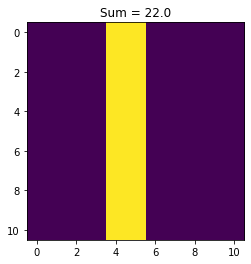

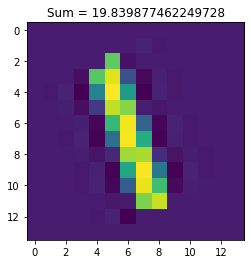

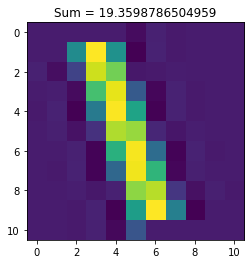

2D array sums
22.0 19.839877462249728 19.3598786504959


In [3]:
angle = 20
size = 11
fwhm = 3

arr = makeRod(size, fwhm)
roted_reshaped = r(arr, angle)
roted = r(arr, angle, reshape=False)
print('2D array images')
for plot in [arr, roted_reshaped, roted]:
    plt.imshow(plot)
    plt.title(f'Sum = {np.sum(plot)}')
    plt.show()

print('2D array sums')
print(np.sum(arr), np.sum(roted_reshaped), np.sum(roted))

# 2D rotations
### N-plot analysis

In [4]:
@np.vectorize
def invariance_analysis_2d(angle=20, size=11, fwhm=3, func=makeRod):
    arr = func(size, fwhm)
    roted_reshaped = r(arr, angle)
    roted = r(arr, angle, reshape=False)
    return np.sum(arr), np.sum(roted_reshaped)/np.sum(arr), np.sum(roted)/np.sum(arr)

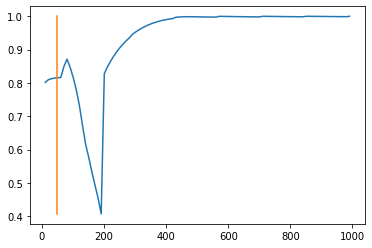

In [5]:
angle=np.arange(0,91,1)
size=np.arange(11,1001,10)

out=invariance_analysis_2d(size=size, fwhm=200, angle=45)
plt.plot(size, out[2])
plt.plot([50, 50], [min(out[2]), max(out[2])])
#plt.plot(angle, invariance_analysis_2d(angle=angle, size=501)[1])

In [6]:
angle = np.arange(0, 91, 5)
size = np.arange(10, 1001, 100)
fwhm=10

arr1 = []
arr2 = []
arr3 = []
for i in range(len(size)):
    print(str(i), end='\r')
    out=invariance_analysis_2d(size=size[i], angle=angle, fwhm=fwhm)
    arr1.append(out[0]/size)
    arr2.append(out[1]/size)
    arr3.append(out[2]/size)
arr1
'''for res in out:
    plt.plot(angle, res)
    plt.title(f'Sum for angle range {[min(angle), max(angle)]}')
    plt.show()
    print(f'Sum range is {round(min(res),2)} to {round(max(res),2)}')'''
for i in [arr1, arr2, arr3]:
    plt.imshow(i, extent=[min(angle), min(size), max(angle), max(size)], aspect='auto')
    plt.show()

ValueError: operands could not be broadcast together with shapes (19,) (10,) 

In [ ]:
angle = np.arange(0, 91, 5)
fwhm = np.arange(10, 1001, 100)
size=500

arr1 = [0]*len(fwhm)
arr2 = [0]*len(fwhm)
arr3 = [0]*len(fwhm)
for i in range(len(fwhm)):
    print(str(i), end='\r')
    arr1[i] = invariance_analysis_2d(fwhm=fwhm[i], angle=angle, size=size)[0]
    arr2[i] = invariance_analysis_2d(fwhm=fwhm[i], angle=angle, size=size)[1]
    arr3[i] = invariance_analysis_2d(fwhm=fwhm[i], angle=angle, size=size)[2]
arr1
'''for res in out:
    plt.plot(angle, res)
    plt.title(f'Sum for angle range {[min(angle), max(angle)]}')
    plt.show()
    print(f'Sum range is {round(min(res),2)} to {round(max(res),2)}')'''
for i in [arr1, arr2, arr3]:
    plt.imshow(i, extent=[min(angle), min(fwhm), max(angle), max(fwhm)], aspect='auto')
    plt.show()

In [84]:
a = np.array([[1,2,3], [4,5,6], [7,8,9]])
b = np.array([[4,5,6], [7,8,9], [7,8,9], [12, 13, 14]])
both = np.concatenate((a,b), axis=0)
both

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [ 7,  8,  9],
       [12, 13, 14]])

In [8]:
c = np.unique(both, axis=0, return_inverse=True, return_counts=True)
c

(array([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [12, 13, 14]]),
 array([0, 1, 2, 1, 2, 2, 3], dtype=int64),
 array([1, 2, 3, 1], dtype=int64))

In [9]:
c[0][np.where(c[2]>1)]

array([[4, 5, 6],
       [7, 8, 9]])

In [10]:
np.array([[],[]]).size

0

In [11]:
np.array([1,2,23]).shape

(3,)

In [12]:
from functools import reduce

In [13]:
reduce(np.multiply, a)

array([ 28,  80, 162])

In [44]:
def makeGaussian(size, fwhm=3, center=None, amp=1):
    """ Make a square gaussian kernel.

    size is the length of a side of the square
    fwhm is full-width-half-maximum, which
    can be thought of as an effective radius.
    """

    x = np.arange(0, size, 1, float)
    y = x[:, np.newaxis]

    if center is None:
        x0 = y0 = size // 2
    else:
        x0 = center[0]
        y0 = center[1]

    return np.exp(-4*np.log(2) * ((x-x0)**2 + (y-y0)**2) / fwhm**2)

a = makeGaussian(101, fwhm=20, amp=1)
np.sum(a/np.sum(a)*10)

10.0

(-99.99999999999999,
 array([[-8.21937368e-10, -6.76036138e-09, -4.45421833e-08,
         -2.35095053e-07, -9.93998848e-07, -3.36665546e-06,
         -9.13443873e-06, -1.98534260e-05, -3.45668224e-05,
         -4.82118567e-05, -5.38664873e-05, -4.82118567e-05,
         -3.45668224e-05, -1.98534260e-05, -9.13443873e-06,
         -3.36665546e-06, -9.93998848e-07, -2.35095053e-07,
         -4.45421833e-08, -6.76036138e-09],
        [-6.76036138e-09, -5.56033681e-08, -3.66355476e-07,
         -1.93363579e-06, -8.17555167e-06, -2.76904402e-05,
         -7.51299421e-05, -1.63292655e-04, -2.84309025e-04,
         -3.96538212e-04, -4.43047043e-04, -3.96538212e-04,
         -2.84309025e-04, -1.63292655e-04, -7.51299421e-05,
         -2.76904402e-05, -8.17555167e-06, -1.93363579e-06,
         -3.66355476e-07, -5.56033681e-08],
        [-4.45421833e-08, -3.66355476e-07, -2.41381663e-06,
         -1.27402006e-05, -5.38664873e-05, -1.82444783e-04,
         -4.95010763e-04, -1.07589091e-03, -1.87323

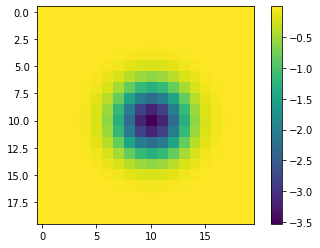

In [66]:
def makeGaussian(size, fwhm=3, center=None, amp=1, norm=False):
    def gaussian():
        """Note: Copied without modification from StackOverflow user giessel.
        
        Make a square gaussian kernel.

        size is the length of a side of the square
        fwhm is full-width-half-maximum, which
        can be thought of as an effective radius.
        """
        x = np.arange(0, size, 1, float)
        y = x[:, np.newaxis]

        if center is None:
            x0 = y0 = size // 2
        else:
            x0 = center[0]
            y0 = center[1]

        return np.exp(-4*np.log(2) * ((x-x0)**2 + (y-y0)**2) / fwhm**2)
    g = gaussian()
    if norm: return amp*g/np.sum(g)
    else: return g

x = makeGaussian(20, fwhm=5, amp=-100, norm=True)
plt.imshow(x)
plt.colorbar()

np.sum(x), x

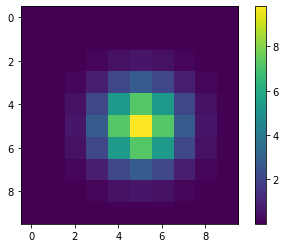

In [67]:
[]*3

[]

In [82]:
from collections.abc import Sequence
list(map(lambda x: isinstance(x, Sequence), [[], [1], 'a', 1]))

[True, True, True, False]

In [95]:
a = np.array([[[1,2],
               [3,4],
               [2,11]], 
              
              [[4,5],
               [5,6],
               [6,7]],
              
              [[7,8],
               [8,9],
               [9,10]]])
np.max(a, axis=1)

array([[ 3, 11],
       [ 6,  7],
       [ 9, 10]])